In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import warnings
warnings.filterwarnings('ignore')

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Insurance Predictions/insurance.csv")

In [114]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.80,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.90,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,no,northwest,10600.55
1334,18,female,31.90,0,no,northeast,2205.98
1335,18,female,36.90,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.95


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.00,30.67,6.10,16.00,26.30,30.40,34.70,53.10
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
expenses,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.92,63770.43


In [116]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [118]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## **EDA**

**Pairplot**

<Figure size 1080x360 with 0 Axes>

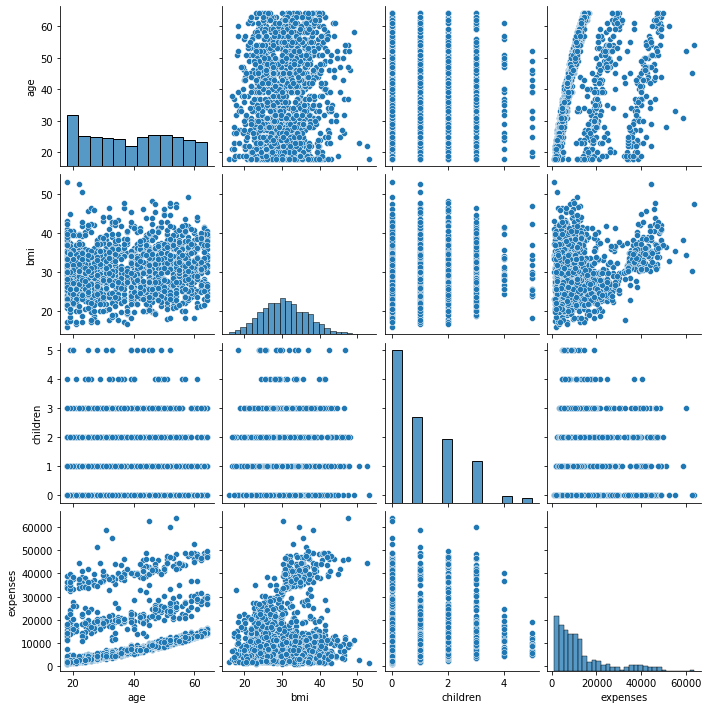

In [119]:
plt.figure(figsize =(15,5))
sns.pairplot(df)

**Heatmap**

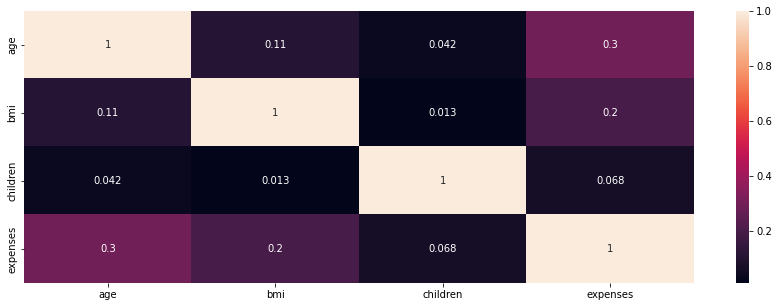

In [120]:
plt.figure(figsize =(15,5))
sns.heatmap(data=df.corr(), annot = True)

**Distplot**

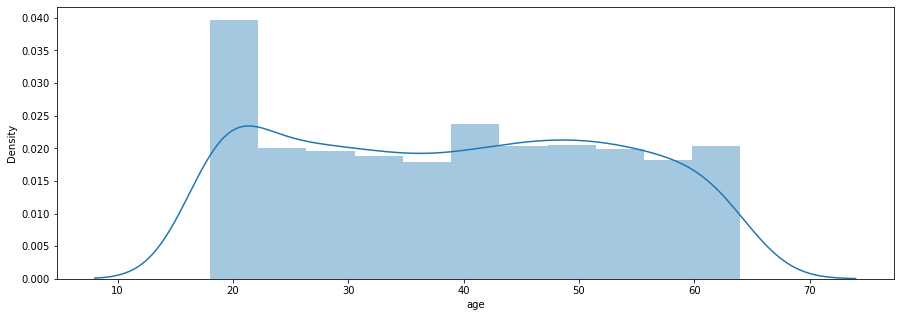

In [121]:
plt.figure(figsize =(15,5))
sns.distplot(df['age'])

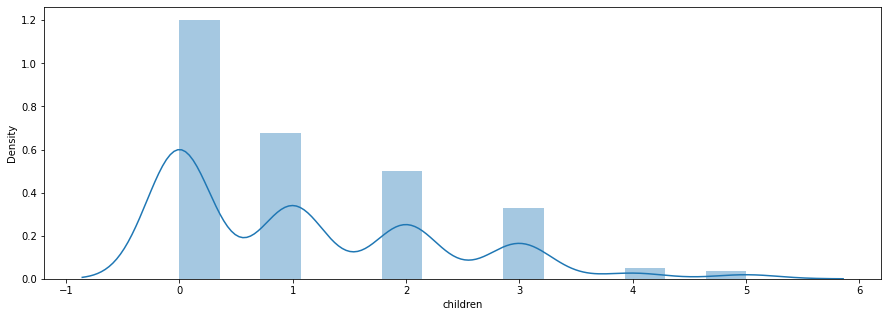

In [122]:
plt.figure(figsize =(15,5))
sns.distplot(df['children'])

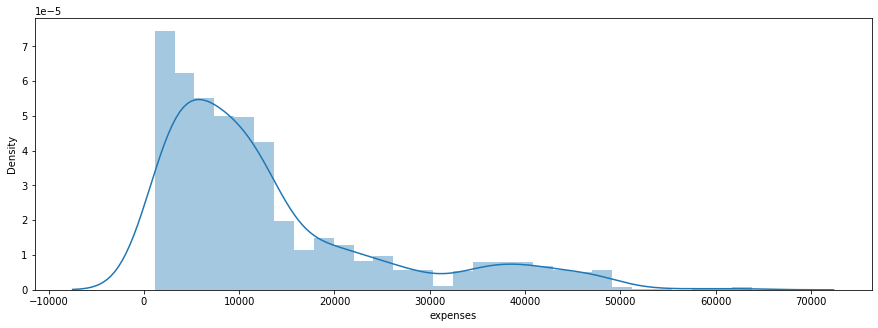

In [123]:
plt.figure(figsize =(15,5))
sns.distplot(df['expenses'])

**Counplot**

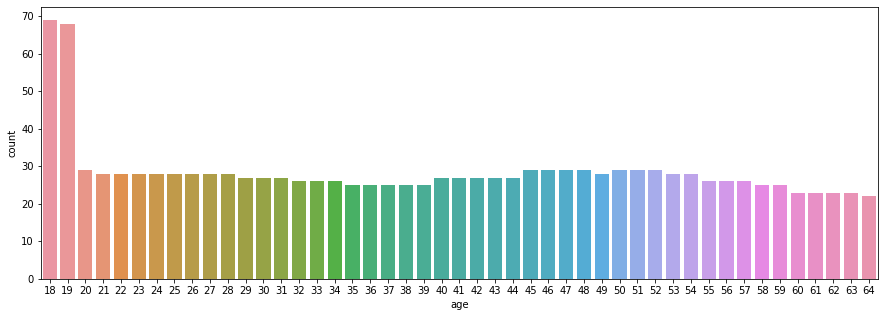

In [124]:
plt.figure(figsize =(15,5))
sns.countplot(df['age'])

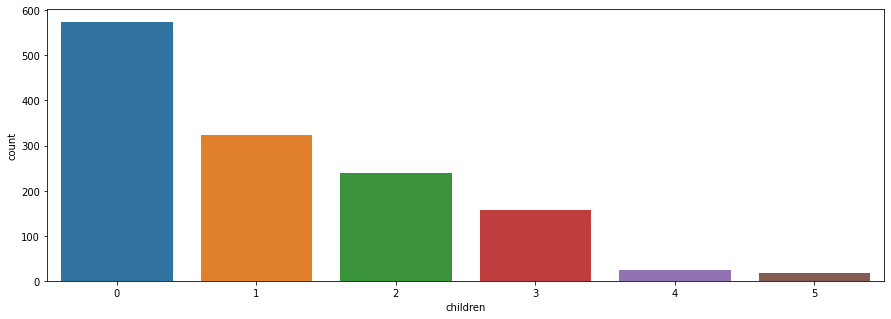

In [125]:
plt.figure(figsize =(15,5))
sns.countplot(df['children'])

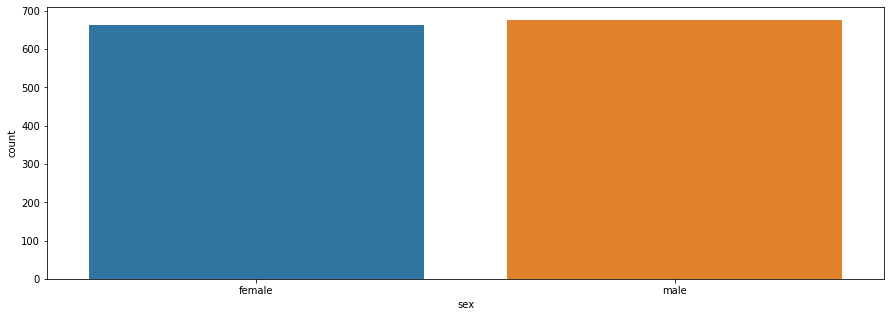

In [126]:
plt.figure(figsize =(15,5))
sns.countplot(df['sex'])

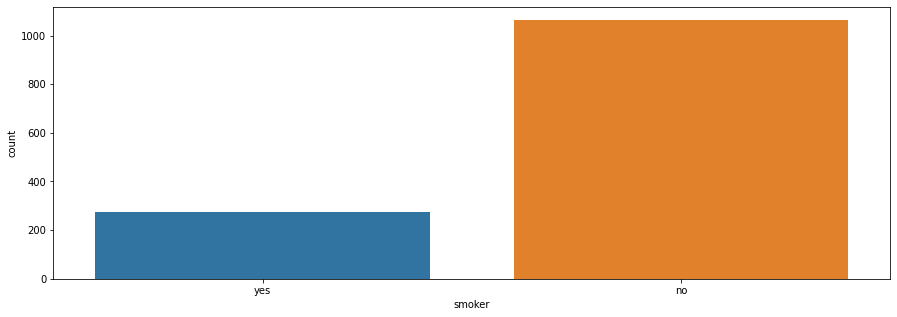

In [127]:
plt.figure(figsize =(15,5))
sns.countplot(df['smoker'])

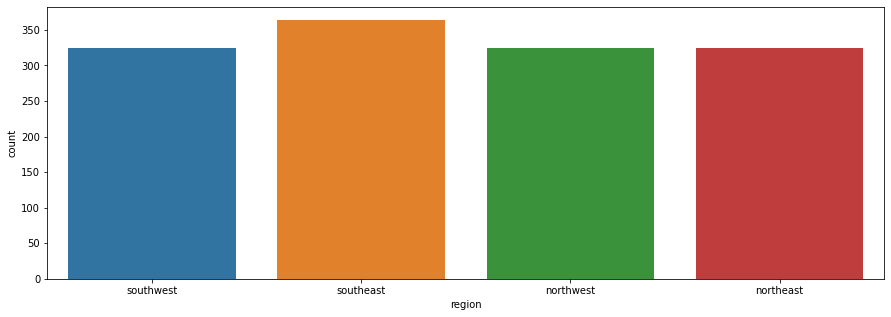

In [128]:
plt.figure(figsize =(15,5))
sns.countplot(df['region'])

**Boxplot**

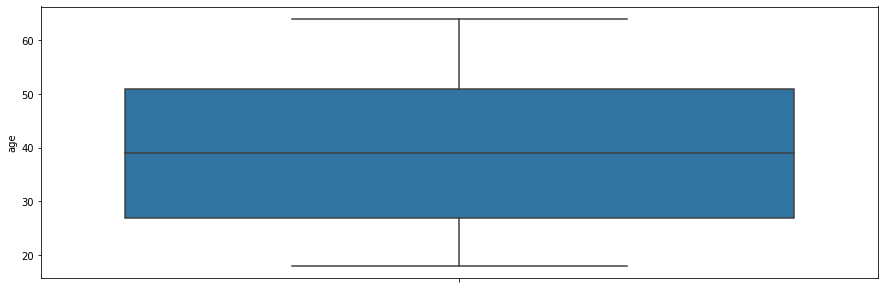

In [129]:
plt.figure(figsize =(15,5))
sns.boxplot(y = 'age', data = df)

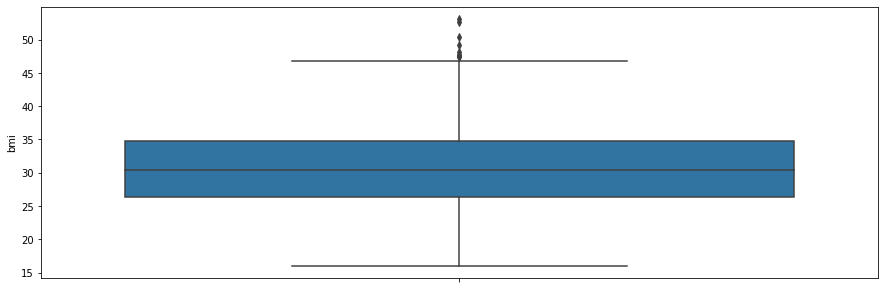

In [130]:
plt.figure(figsize =(15,5))
sns.boxplot(y = 'bmi', data = df)

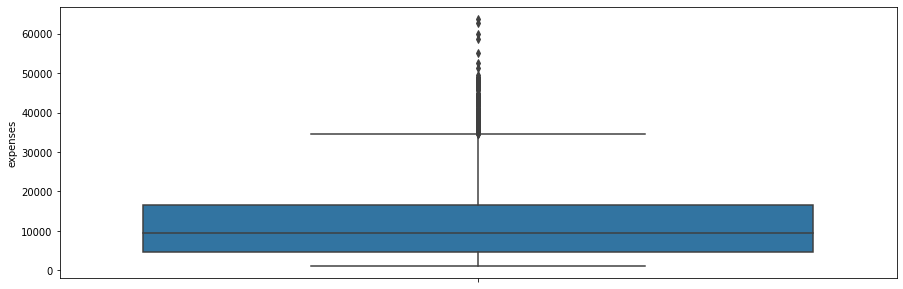

In [131]:
plt.figure(figsize =(15,5))
sns.boxplot(y = 'expenses', data = df)

## **Encoding**

In [132]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.80,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.90,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,no,northwest,10600.55
1334,18,female,31.90,0,no,northeast,2205.98
1335,18,female,36.90,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.95


In [133]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['sex'] = label.fit_transform(df['sex'])
df['smoker'] = label.fit_transform(df['smoker'])
df['region'] = label.fit_transform(df['region'])

In [134]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.90,0,1,3,16884.92
1,18,1,33.80,1,0,2,1725.55
2,28,1,33.00,3,0,2,4449.46
3,33,1,22.70,0,0,1,21984.47
4,32,1,28.90,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.00,3,0,1,10600.55
1334,18,0,31.90,0,0,0,2205.98
1335,18,0,36.90,0,0,2,1629.83
1336,21,0,25.80,0,0,3,2007.95


In [135]:
label.fit_transform(np.array(["sex"]))

array([0])

## **Segregating Dependent and Independent Variables**

In [151]:
X = df[['age', 'sex', 'bmi', 'children','smoker','region']]
y = df['expenses']

## **Train Test Split**

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## **Feature Scaling**

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [155]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Creation**

## **Linear Regression**

In [156]:
X_train

array([[ 0.26510612, -1.02486255, -0.91034542, -0.9126072 , -0.51530255,
        -1.32346971],
       [-0.01650038,  0.9757406 ,  0.79502679,  0.74768935,  1.94060749,
         1.37773499],
       [ 0.40590937, -1.02486255, -0.00750131, -0.08245892,  1.94060749,
        -0.42306815],
       ...,
       [ 1.32113048,  0.9757406 , -0.89362609, -0.9126072 , -0.51530255,
        -1.32346971],
       [-0.15730363, -1.02486255,  2.85150504,  0.74768935,  1.94060749,
         1.37773499],
       [ 1.10992561,  0.9757406 , -0.10781732, -0.9126072 , -0.51530255,
         1.37773499]])

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)
print(f"Test Score : {r2_score(y_test, y_pred)}")
print(f"Train Score : {r2_score(y_train, regression.predict(X_train))}")

Test Score : 0.7602806561842601
Train Score : 0.7454974450141258


In [158]:
import pickle
pickle.dump(regression, open('model_lg.pkl','wb'))

## **Lazy Predict**

In [144]:
%pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
lazy_reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:26<00:00,  1.61it/s]

[20:01:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [146]:
models
# predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.86,0.86,4579.76,0.05
GradientBoostingRegressor,0.85,0.85,4624.87,0.15
KNeighborsRegressor,0.85,0.85,4633.91,0.01
HistGradientBoostingRegressor,0.84,0.84,4805.69,0.31
LGBMRegressor,0.84,0.84,4864.03,0.06
RandomForestRegressor,0.83,0.84,4917.19,0.33
BaggingRegressor,0.82,0.82,5088.93,0.05
AdaBoostRegressor,0.80,0.81,5321.64,0.03
ExtraTreesRegressor,0.80,0.80,5354.51,0.19


## **XgBoost Regressor**

In [147]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Instantiation
xgb_r = xg.XGBRegressor()
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
y_pred_xg = xgb_r.predict(X_test)

# #r2 score test
# print(f"Test Score : {round(r2_score(y_test, y_pred),2)}")

# #r2 score test
# print(f"Train Score : {round(r2_score(y_train, xgb_r.predict(X_train)),2)}")

# # RMSE Computation
# rmse = np.sqrt(MSE(y_test, y_pred))
# print("RMSE : % f" %(rmse))

MSE_XG = round(mean_squared_error(y_test, y_pred_xg),2)
MAE_XG = round(mean_absolute_error(y_test, y_pred_xg),2)
RMSE_XG =  round(np.sqrt(mean_squared_error(y_test, y_pred_xg)),2)
print(f"MSE : {MSE_XG}\nMAE : {MAE_XG}\nRMSE : {RMSE_XG}")

XG_r2_score = round(r2_score(y_test, y_pred_xg),3)
XG_adj_r2_score = round(1-((1-XG_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),3)
print(f"Test>R-Squared Accuracy : {XG_r2_score}  \nTest>Adjusted R-Squared Accuracy : {XG_adj_r2_score}")

XG_train_r2_score = round(r2_score(y_train, xgb_r.predict(X_train)),3)
XG_train_adj_r2_score = round(1-((1-XG_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),3)
print(f"Train> R-Squared Accuracy : {XG_train_r2_score}  \nTrain>Adjusted R-Squared Accuracy : {XG_train_adj_r2_score}")

[20:01:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE : 20974158.24
MAE : 2531.39
RMSE : 4579.76
Test>R-Squared Accuracy : 0.857  
Test>Adjusted R-Squared Accuracy : 0.856
Train> R-Squared Accuracy : 0.898  
Train>Adjusted R-Squared Accuracy : 0.898


# **Save Model**

In [148]:
# import pickle
# pickle.dump(regressor, open('model.pkl','wb'))

# model = pickle.load(open('model.pkl','rb'))